# Relationship between the schools and Gun Violence




In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import folium
from shapely.geometry import Point
import utm

import pyproj
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [10]:
m = folium.Map(location=[42.3601, -71.0589], zoom_start=12)
# Read the police districts shapefile
police_districts = gpd.read_file('locationsshapefiles/Police_Districts/Police_Districts.shp')
selected_districts = ['C11', 'B2', 'B3']

# Create a GeoJSON layer for the police districts
folium.GeoJson(police_districts, style_function=lambda x: {'color': 'green' if x['properties']['DISTRICT'] in selected_districts else 'blue', 'weight': 2}).add_to(m)

m

In [11]:
selected_police_districts_gdf = police_districts[police_districts['DISTRICT'].isin(selected_districts)]

def point_within_selected_districts(lat, lon, selected_police_districts_gdf):
    point = Point(lon, lat)
    return selected_police_districts_gdf['geometry'].apply(lambda x: x.contains(point) or x.touches(point)).any()


In [12]:
school_data = pd.read_csv('locationscsv/school.csv')
school_data.dropna()
school_data['within_selected_districts'] = school_data.apply(lambda row: point_within_selected_districts(row['lat'], row['lon'], selected_police_districts_gdf), axis=1)

school_data = school_data[school_data['within_selected_districts']]


for index, row in school_data.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        icon=folium.Icon(color='black'),
        popup=row['Org Name']
    ).add_to(m)

# Display the map
m



In [13]:
# Read the school data
schools = pd.read_csv('locationscsv/school.csv')

# Filter the schools to include only the rows with locations outside the green border
schools['outside_selected_districts'] = ~schools.apply(lambda row: point_within_selected_districts(row['lat'], row['lon'], selected_police_districts_gdf), axis=1)
schools_outside_border = schools[schools['outside_selected_districts']]



In [14]:
# Find the rows with NaN values in lat or lon
null_mask = schools_outside_border[['lat', 'lon']].isna().any(axis=1)
# Drop the rows with NaN values
schools_outside_border = schools_outside_border[~null_mask]

# Add markers for each filtered school location
for index, row in schools_outside_border.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        icon=folium.Icon(color='white'),
        popup=row['Org Name']
    ).add_to(m)

m

In [15]:
df_d2007 = pd.read_csv("dropout/dropout2007-08.csv")
df_d2008 = pd.read_csv("dropout/dropout2008-09.csv")
df_d2009 = pd.read_csv("dropout/dropout2009-10.csv")
df_d2010 = pd.read_csv("dropout/dropout2010-11.csv")
df_d2011 = pd.read_csv("dropout/dropout2011-12.csv")
df_d2012 = pd.read_csv("dropout/dropout2012-13.csv")
df_d2013 = pd.read_csv("dropout/dropout2013-14.csv") 
df_d2014 = pd.read_csv("dropout/dropout2014-15.csv")
df_d2015 = pd.read_csv("dropout/dropout2015-16.csv")
df_d2016 = pd.read_csv("dropout/dropout2016-17.csv")
df_d2017 = pd.read_csv("dropout/dropout2017-18.csv")
df_d2018 = pd.read_csv("dropout/dropout2018-19.csv")
df_d2019 = pd.read_csv("dropout/dropout2019-20.csv")
df_d2020 = pd.read_csv("dropout/dropout2020-21.csv")
df_d2022 = pd.read_csv("dropout/dropout2021-22.csv")

In [16]:
frames = [df_d2007, df_d2008, df_d2009, df_d2010, df_d2011, df_d2012, df_d2013, df_d2014, df_d2015, df_d2016, df_d2017, df_d2018, df_d2019, df_d2020, df_d2022]
df_dropout = pd.concat(frames, axis=0, ignore_index=True)

In [17]:
df_boston_dropout = df_dropout[df_dropout['School Name'].str.contains('Boston')]
df_boston_dropout.head()

School Name  School Code   
35            Boston - Academy of Public Service       350502  \
36            Boston - Another Course To College       350541   
37                 Boston - Boston Adult Academy       350548   
38                  Boston - Boston Arts Academy       350546   
39  Boston - Boston Community Leadership Academy       350558   

   # Enrolled Grades 09 through 12  # Dropout All Grades   
35                             281                  31.0  \
36                             228                  16.0   
37                             280                  60.0   
38                             438                  10.0   
39                             400                  10.0   

    % Dropout All Grades  % Dropout Grade 09  % Dropout Grade 10   
35                  11.0                15.4                13.0  \
36                   7.0                 3.4                 3.2   
37                  21.4                 NaN                27.3   
38                   2.3                 1.6                 0.8   
39                   2.5                 2.6                 1.0   

    % Dropout Grade 11  % Dropout Grade 12     Year  
35                 6.5                 6.8  2007-08  
36                14.0                 8.6  2007-08  
37                19.2                20.5  2007-08  
38                 1.0                 6.3  2007-08  
39                 3.4                 3.1  2007-08

In [18]:
# Remove spaces, colons, and hyphens from School Name column of df_boston_dropout
df_boston_dropout['School Name'] = df_boston_dropout['School Name'].str.replace(' ', '').str.replace(':', '').str.replace('-', '')

# Remove spaces, colons, and hyphens from Org Name column of school_data
school_data['Org Name'] = school_data['Org Name'].str.replace(' ', '').str.replace(':', '').str.replace('-', '')

# Extract the Org Name values from school_data and create a list
org_names = school_data['Org Name'].tolist()

# Filter df_boston_dropout to only include rows with matching Org Name values
df_boston_dropout_inside = df_boston_dropout[df_boston_dropout['School Name'].str.replace(' ', '').str.replace(':', '').str.replace('-', '').isin(org_names)]

df_boston_dropout_inside.head()


School Name  School Code   
42                           BostonBostonLatinAcademy       350545  \
48           BostonCommunityAcademyofScienceandHealth       350581   
52                             BostonFenwayHighSchool       350540   
66                            BostonTechBostonAcademy       350539   
72  BostonDayandEveningAcademyCharter(District)Bos...      4240505   

   # Enrolled Grades 09 through 12  # Dropout All Grades   
42                           1,107                   5.0  \
48                             385                  34.0   
52                             289                   5.0   
66                             375                   9.0   
72                             267                  98.0   

    % Dropout All Grades  % Dropout Grade 09  % Dropout Grade 10   
42                   0.5                 0.3                 0.4  \
48                   8.8                 5.3                16.0   
52                   1.7                 2.8                 0.0   
66                   2.4                 3.9                 4.2   
72                  36.7                52.6                47.7   

    % Dropout Grade 11  % Dropout Grade 12     Year  
42                 0.7                 0.5  2007-08  
48                12.5                 3.2  2007-08  
52                 2.8                 1.5  2007-08  
66                 1.0                 0.0  2007-08  
72                33.9                26.0  2007-08

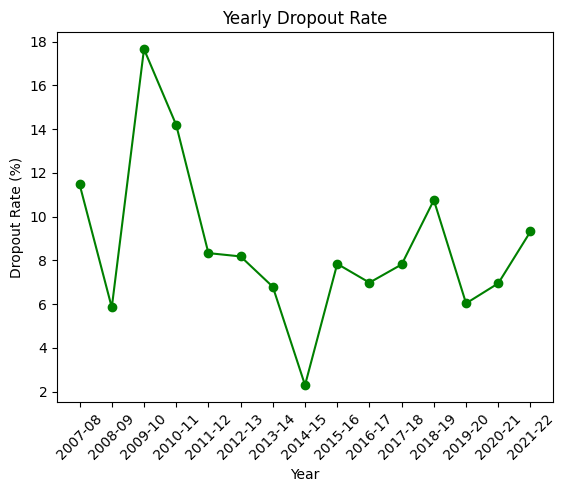

In [19]:
# Convert Year column to string
df_boston_dropout_inside['Year'] = df_boston_dropout_inside['Year'].astype(str)

# Group the data by Year and sum the columns for enrolled students and dropouts
enrolled_and_dropout_by_year = df_boston_dropout_inside.groupby('Year').agg({'# Enrolled Grades 09 through 12': lambda x: pd.to_numeric(x, errors='coerce').sum(), '# Dropout All Grades': 'sum'})

# Calculate the dropout rate as a percentage of enrolled students for each year
dropout_rate_by_year = (enrolled_and_dropout_by_year['# Dropout All Grades'] / enrolled_and_dropout_by_year['# Enrolled Grades 09 through 12']) * 100

# Reset the index of the DataFrame to make Year a column
dropout_rate_by_year = dropout_rate_by_year.reset_index()

# Plot line graph of dropout rate by year
plt.plot(dropout_rate_by_year['Year'], dropout_rate_by_year[0], marker='o',color = 'g')

# Set title and axis labels
plt.title('Yearly Dropout Rate')
plt.xlabel('Year')
plt.ylabel('Dropout Rate (%)')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Display plot
plt.show()


In [20]:
# Remove spaces, colons, and hyphens from School Name column of df_boston_dropout
df_boston_dropout['School Name'] = df_boston_dropout['School Name'].str.replace(' ', '').str.replace(':', '').str.replace('-', '')

# Remove spaces, colons, and hyphens from Org Name column of schools_outside_border
schools_outside_border['Org Name'] = schools_outside_border['Org Name'].str.replace(' ', '').str.replace(':', '').str.replace('-', '')

# Extract the Org Name values from schools_outside_border and create a list
org_names = schools_outside_border['Org Name'].tolist()

# Filter df_boston_dropout to only include rows with matching Org Name values
df_boston_dropout_outside = df_boston_dropout[df_boston_dropout['School Name'].str.replace(' ', '').str.replace(':', '').str.replace('-', '').isin(org_names)]

df_boston_dropout_outside.head()


School Name  School Code   
36            BostonAnotherCourseToCollege       350541  \
38                 BostonBostonArtsAcademy       350546   
39  BostonBostonCommunityLeadershipAcademy       350558   
47                  BostonCommunityAcademy       350518   
51                   BostonExcelHighSchool       350522   

   # Enrolled Grades 09 through 12  # Dropout All Grades   
36                             228                  16.0  \
38                             438                  10.0   
39                             400                  10.0   
47                              75                  18.0   
51                             393                  35.0   

    % Dropout All Grades  % Dropout Grade 09  % Dropout Grade 10   
36                   7.0                 3.4                 3.2  \
38                   2.3                 1.6                 0.8   
39                   2.5                 2.6                 1.0   
47                  24.0                 NaN                15.6   
51                   8.9                11.9                 8.1   

    % Dropout Grade 11  % Dropout Grade 12     Year  
36                14.0                 8.6  2007-08  
38                 1.0                 6.3  2007-08  
39                 3.4                 3.1  2007-08  
47                40.0                22.7  2007-08  
51                 8.0                 5.6  2007-08

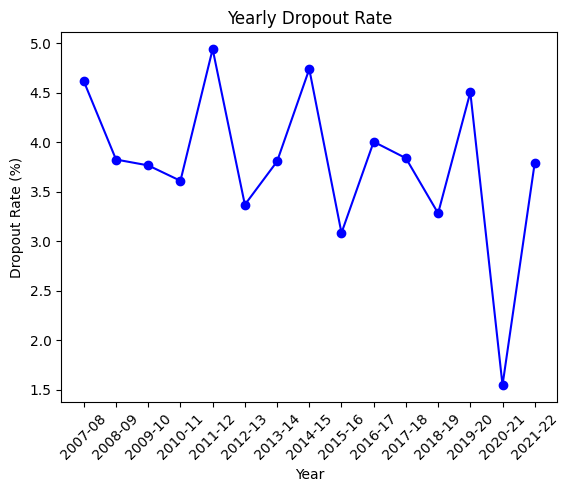

In [21]:
# Convert Year column to string
df_boston_dropout_outside['Year'] = df_boston_dropout_outside['Year'].astype(str)

# Group the data by Year and sum the columns for enrolled students and dropouts
enrolled_and_dropout_by_year = df_boston_dropout_outside.groupby('Year').agg({'# Enrolled Grades 09 through 12': lambda x: pd.to_numeric(x, errors='coerce').sum(), '# Dropout All Grades': 'sum'})

# Calculate the dropout rate as a percentage of enrolled students for each year
dropout_rate_by_year = (enrolled_and_dropout_by_year['# Dropout All Grades'] / enrolled_and_dropout_by_year['# Enrolled Grades 09 through 12']) * 100

# Reset the index of the DataFrame to make Year a column
dropout_rate_by_year = dropout_rate_by_year.reset_index()

# Plot line graph of dropout rate by year
plt.plot(dropout_rate_by_year['Year'], dropout_rate_by_year[0], marker='o',color = 'b')

# Set title and axis labels
plt.title('Yearly Dropout Rate')
plt.xlabel('Year')
plt.ylabel('Dropout Rate (%)')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Display plot
plt.show()



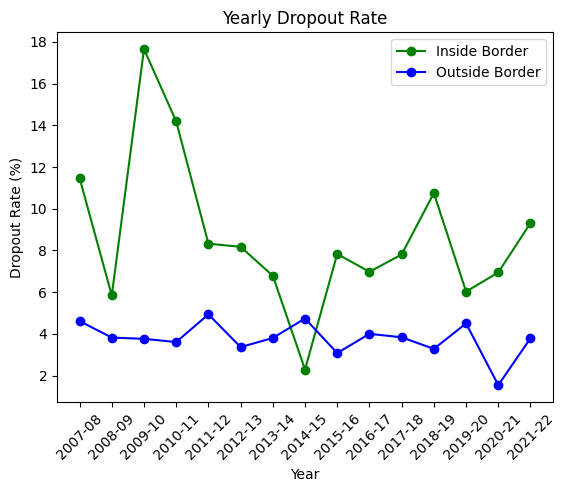

In [22]:
# Convert Year column to string for both data frames
df_boston_dropout_inside['Year'] = df_boston_dropout_inside['Year'].astype(str)
df_boston_dropout_outside['Year'] = df_boston_dropout_outside['Year'].astype(str)

# Group the data by Year and sum the columns for enrolled students and dropouts for both data frames
enrolled_and_dropout_by_year_inside = df_boston_dropout_inside.groupby('Year').agg({'# Enrolled Grades 09 through 12': lambda x: pd.to_numeric(x, errors='coerce').sum(), '# Dropout All Grades': 'sum'})
enrolled_and_dropout_by_year_outside = df_boston_dropout_outside.groupby('Year').agg({'# Enrolled Grades 09 through 12': lambda x: pd.to_numeric(x, errors='coerce').sum(), '# Dropout All Grades': 'sum'})

# Calculate the dropout rate as a percentage of enrolled students for each year for both data frames
dropout_rate_by_year_inside = (enrolled_and_dropout_by_year_inside['# Dropout All Grades'] / enrolled_and_dropout_by_year_inside['# Enrolled Grades 09 through 12']) * 100
dropout_rate_by_year_outside = (enrolled_and_dropout_by_year_outside['# Dropout All Grades'] / enrolled_and_dropout_by_year_outside['# Enrolled Grades 09 through 12']) * 100

# Reset the index of the DataFrames to make Year a column for both data frames
dropout_rate_by_year_inside = dropout_rate_by_year_inside.reset_index()
dropout_rate_by_year_outside = dropout_rate_by_year_outside.reset_index()

# Plot line graphs of dropout rate by year for both data frames
plt.plot(dropout_rate_by_year_inside['Year'], dropout_rate_by_year_inside[0], marker='o',color = 'g', label='Inside Border')
plt.plot(dropout_rate_by_year_outside['Year'], dropout_rate_by_year_outside[0], marker='o',color = 'b', label='Outside Border')

# Set title and axis labels
plt.title('Yearly Dropout Rate')
plt.xlabel('Year')
plt.ylabel('Dropout Rate (%)')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Display plot
plt.show()


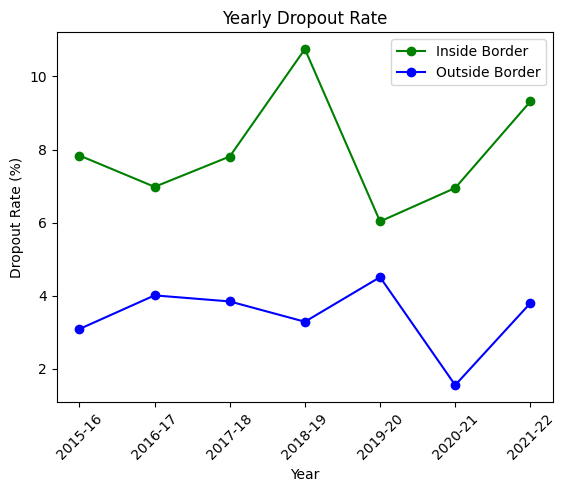

In [23]:
# Convert Year column to string for both data frames
df_boston_dropout_inside['Year'] = df_boston_dropout_inside['Year'].astype(str)
df_boston_dropout_outside['Year'] = df_boston_dropout_outside['Year'].astype(str)

# Group the data by Year and sum the columns for enrolled students and dropouts for both data frames
enrolled_and_dropout_by_year_inside = df_boston_dropout_inside.groupby('Year').agg({'# Enrolled Grades 09 through 12': lambda x: pd.to_numeric(x, errors='coerce').sum(), '# Dropout All Grades': 'sum'})
enrolled_and_dropout_by_year_outside = df_boston_dropout_outside.groupby('Year').agg({'# Enrolled Grades 09 through 12': lambda x: pd.to_numeric(x, errors='coerce').sum(), '# Dropout All Grades': 'sum'})

# Calculate the dropout rate as a percentage of enrolled students for each year for both data frames
dropout_rate_by_year_inside = (enrolled_and_dropout_by_year_inside['# Dropout All Grades'] / enrolled_and_dropout_by_year_inside['# Enrolled Grades 09 through 12']) * 100
dropout_rate_by_year_outside = (enrolled_and_dropout_by_year_outside['# Dropout All Grades'] / enrolled_and_dropout_by_year_outside['# Enrolled Grades 09 through 12']) * 100

# Reset the index of the DataFrames to make Year a column for both data frames
dropout_rate_by_year_inside = dropout_rate_by_year_inside.reset_index()
dropout_rate_by_year_outside = dropout_rate_by_year_outside.reset_index()

# Filter the data to only include years in the specified list
years_to_include = ['2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']
dropout_rate_by_year_inside = dropout_rate_by_year_inside[dropout_rate_by_year_inside['Year'].isin(years_to_include)]
dropout_rate_by_year_outside = dropout_rate_by_year_outside[dropout_rate_by_year_outside['Year'].isin(years_to_include)]

# Plot line graphs of dropout rate by year for both data frames
plt.plot(dropout_rate_by_year_inside['Year'], dropout_rate_by_year_inside[0], marker='o', color='g', label='Inside Border')
plt.plot(dropout_rate_by_year_outside['Year'], dropout_rate_by_year_outside[0], marker='o', color='b', label='Outside Border')

# Set title and axis labels
plt.title('Yearly Dropout Rate')
plt.xlabel('Year')
plt.ylabel('Dropout Rate (%)')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Display plot
plt.show()


In [24]:
# filtered_df['within_selected_districts'] = df_new.apply(lambda row: point_within_selected_districts(row['Lat'], row['Long'], selected_police_districts_gdf), axis=1).reset_index(drop=True)

# filtered_df['within_selected_districts'] = filtered_df['within_selected_districts'].astype(int)
# inside_counts = filtered_df.groupby('YEAR')['within_selected_districts'].sum()
# total_counts = filtered_df.groupby('YEAR').size()
# inside_percentages = inside_counts / total_counts * 100
# outside_percentages = 100 - inside_percentages
# plt.plot(inside_percentages.index, inside_percentages.values, label='Inside Selected Districts')
# plt.plot(outside_percentages.index, outside_percentages.values, label='Outside Selected Districts')
# plt.xlabel('Year')
# plt.ylabel('Percentage of Incidents')
# plt.title('Percentage of Incidents by Year and Location')
# plt.legend()
# plt.show()


In [25]:

# # Load the crime reports for different years
# df_2015 = pd.read_csv("crime_reports/cir_2015.csv")
# df_2016 = pd.read_csv("crime_reports/cir_2016.csv")
# df_2017 = pd.read_csv("crime_reports/cir_2017.csv")
# df_2018 = pd.read_csv("crime_reports/cir_2018.csv")
# df_2019 = pd.read_csv("crime_reports/cir_2019.csv")
# df_2020 = pd.read_csv("crime_reports/cir_2020.csv")
# df_2021 = pd.read_csv("crime_reports/cir_2021.csv")
# df_2022 = pd.read_csv("crime_reports/cir_2022.csv")

# # Combine the datasets of different years
# frames = [df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022]
# df = pd.concat(frames)

# # Select only the columns of interest
# df_new = df[['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_DESCRIPTION', 'DISTRICT', 'YEAR', 'Lat', 'Long']].copy()

# # Remove rows with missing values for the selected columns
# df_new = df_new.dropna(subset=['DISTRICT', 'Lat', 'Long', 'YEAR'])

# # Create a new column indicating if the incident occurred within or touches the selected districts
# df_new['within_selected_districts'] = df_new.apply(lambda row: point_within_selected_districts(row['Lat'], row['Long'], selected_police_districts_gdf), axis=1).astype(int)


# # Define filtered_df as a copy of df_new with only the columns of interest
# filtered_df = df_new[['YEAR', 'within_selected_districts',''DISTRICT'']].copy()


In [26]:

# filtered_df['within_selected_districts'] = filtered_df['within_selected_districts'].astype(int)
# inside_counts = filtered_df.groupby('YEAR')['within_selected_districts'].sum()
# total_counts = filtered_df.groupby('YEAR').size()
# inside_percentages = inside_counts / total_counts * 100

# # Select only the inside percentages
# inside_percentages_filtered = inside_percentages[inside_percentages > 0]

# plt.plot(inside_percentages_filtered.index, inside_percentages_filtered.values, marker='o', color='g')
# plt.xlabel('Year')
# plt.ylabel('Percentage of Incidents')
# plt.title('Percentage of Incidents Inside Selected Districts by Year')
# plt.show()


In [27]:
# Load the crime reports for different years
df_2015 = pd.read_csv("crime_reports/cir_2015.csv")
df_2016 = pd.read_csv("crime_reports/cir_2016.csv")
df_2017 = pd.read_csv("crime_reports/cir_2017.csv")
df_2018 = pd.read_csv("crime_reports/cir_2018.csv")
df_2019 = pd.read_csv("crime_reports/cir_2019.csv")
df_2020 = pd.read_csv("crime_reports/cir_2020.csv")
df_2021 = pd.read_csv("crime_reports/cir_2021.csv")
df_2022 = pd.read_csv("crime_reports/cir_2022.csv")

# Combine the datasets of different years
frames = [df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022]
df = pd.concat(frames)

# Select only the columns of interest
df_new = df[['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_DESCRIPTION', 'DISTRICT', 'YEAR', 'Lat', 'Long']].copy()

# Remove rows with missing values for the selected columns
df_new = df_new.dropna(subset=['DISTRICT', 'Lat', 'Long', 'YEAR'])

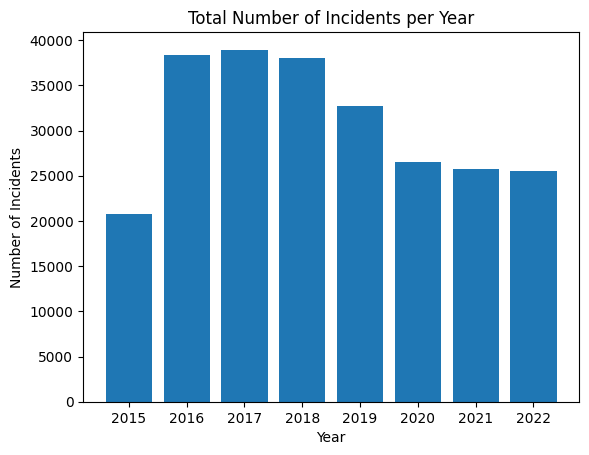

In [28]:


# Select only the rows that occurred within the selected police districts
selected_districts = ['B2', 'B3', 'C11']
df_new = df_new[df_new['DISTRICT'].isin(selected_districts)]
incidents_per_year = df_new.groupby('YEAR')['INCIDENT_NUMBER'].count()

# Create a bar plot
plt.bar(incidents_per_year.index, incidents_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Total Number of Incidents per Year')
plt.show()

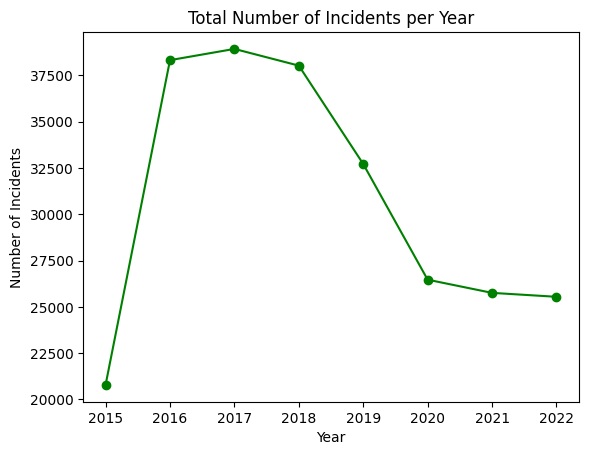

In [29]:
import matplotlib.pyplot as plt

# Group the data by year and count the number of incidents in each year
incidents_per_year = df_new.groupby('YEAR')['INCIDENT_NUMBER'].count()

# Create a line graph with markers
plt.plot(incidents_per_year.index, incidents_per_year.values, color='green', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Total Number of Incidents per Year')
plt.show()


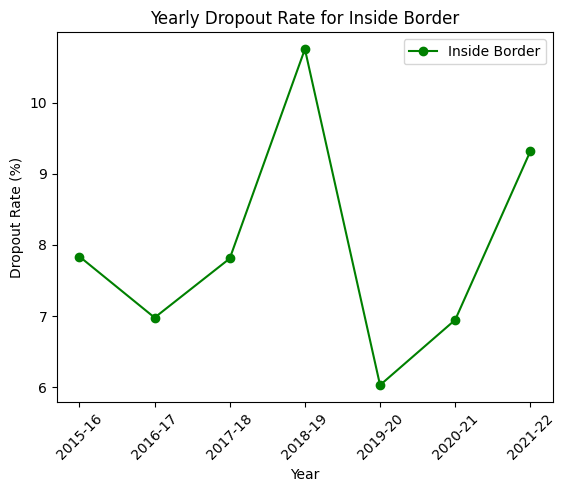

In [30]:
# Plot line graph of dropout rate by year for Inside Border
plt.plot(dropout_rate_by_year_inside['Year'], dropout_rate_by_year_inside[0], marker='o', color='g', label='Inside Border')

# Set title and axis labels
plt.title('Yearly Dropout Rate for Inside Border')
plt.xlabel('Year')
plt.ylabel('Dropout Rate (%)')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Display plot
plt.show()


In [42]:
df_boston_dropout_inside['Start_Year'] = df_boston_dropout_inside['Year'].apply(lambda x: int(x.split('-')[0]))
df_boston_dropout_inside['End_Year'] = df_boston_dropout_inside['Year'].apply(lambda x: int(x.split('-')[1]) + 2000 if len(x.split('-')[1]) == 2 else int(x.split('-')[1]))

year_counts = (df_boston_dropout_inside['Start_Year'].value_counts() + df_boston_dropout_inside['End_Year'].value_counts()) / 2
total_count = year_counts.sum()


2007    NaN
2008    5.0
2009    4.5
2010    4.0
2011    4.5
2012    5.0
2013    5.0
2014    4.5
2015    4.5
2016    5.0
2017    5.0
2018    5.0
2019    5.0
2020    5.0
2021    8.5
2022    NaN
Name: count, dtype: float64
Total count: 70.5


In [43]:
year_counts_sorted = year_counts.sort_index()
incidents_per_year_sorted = incidents_per_year.sort_index()

correlation = year_counts_sorted.corr(incidents_per_year_sorted)
print("Correlation:", correlation)

Correlation: -0.2501944221839939
